In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


In [2]:
import pandas as pd
from Levenshtein import distance as levenshtein_distance

In [3]:
agent_data_path = 'data/round3/results/all_step_aa_seqs.csv'

agent_data = pd.read_csv(agent_data_path)
print(len(agent_data)), print(list(agent_data.columns))
display(agent_data[['weight', 'raw_activity']].sample())

89767
['step', 'aa_seqs', 'weight', 'activity', 'stability', 'raw_activity', 'raw_stability', 'bonus', 'agent_likelihood', 'prior_likelihood', 'augmented_likelihood']


,weight,raw_activity
13809,0.649426,-0.212762


In [4]:
savinase = 'AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGGASFVPGEPSTQDGNGHGTHVAGTIAALNNSIGVLGVAPSAELYAVKVLGASGSGSVSSIAQGLEWAGNNGMHVANLSLGSPSPSATLEQAVNSATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNVQSTYPGSTYASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGSTNLYGSGLVNAEAATR'

def edit_distance2wildtype(variant_seq, wildtype=savinase):
    try:
        return levenshtein_distance(variant_seq, wildtype)
    except:
        raise Exception(f"variant_seq value error {variant_seq}")

In [5]:
agent_data['is_success'] = (agent_data.raw_activity >= 0)
agent_data['dist2wt'] = [edit_distance2wildtype(seq) for seq in agent_data['aa_seqs']]
agent_data['seq_len'] = agent_data['aa_seqs'].str.len()

opt_step = agent_data.sort_values(by=['step'])


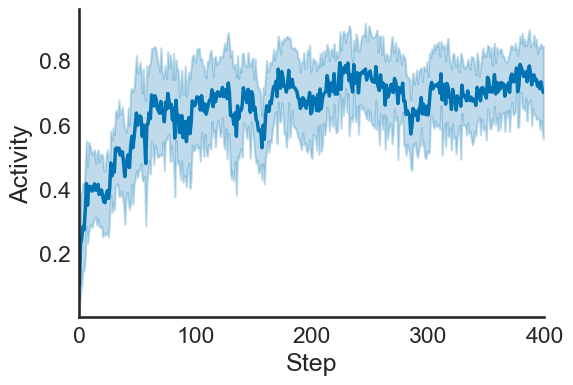

In [6]:
from utils import plot_style_utils
import numpy as np

plot_style_utils.set_pub_plot_context(context="talk")

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

prop = 'raw_activity'
ylabel = 'Activity'
n_step = 400
# take exp of the activity to make it more interpretable
opt_step[prop] = np.exp(opt_step[prop])
df_plot = opt_step[opt_step.step < n_step][['step', prop]].groupby('step').mean()
df_plot_std = opt_step[opt_step.step < n_step][['step', prop]].groupby('step').std()
line_color = plot_style_utils.CAT_PALETTE[0]

ax.plot(df_plot.index.values, df_plot[prop].values, 
        color=line_color, linewidth=2.5)
ax.fill_between(df_plot.index.values, 
                df_plot[prop].values - df_plot_std[prop].values, 
                df_plot[prop].values + df_plot_std[prop].values, 
                color=line_color,
                alpha=0.25)

ax.set_xlabel('Step')
ax.set_ylabel(ylabel)
ax.set_xlim(0, n_step)
# ax.set_ylim(-2.5, 0)
plot_style_utils.save_for_pub(fig, path='figures/round3/R3_step_activity')


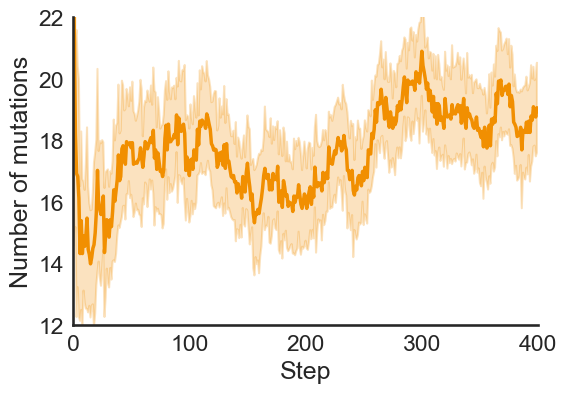

In [7]:
from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

prop = 'dist2wt'
ylabel = 'Number of mutations'
n_step = 400

df_plot = opt_step[opt_step.step < n_step][['step', prop]].groupby('step').mean()
df_plot_std = opt_step[opt_step.step < n_step][['step', prop]].groupby('step').std()

line_color = '#F18F01' 

ax.plot(df_plot.index.values, df_plot[prop].values, 
        color=line_color, linewidth=2.5)

ax.fill_between(df_plot.index.values, 
                df_plot[prop].values - df_plot_std[prop].values, 
                df_plot[prop].values + df_plot_std[prop].values, 
                color=line_color,
                alpha=0.25)

ax.set_xlabel('Step')
ax.set_ylabel(ylabel)
ax.set_xlim(0, n_step)
ax.set_ylim(12, 22)
plot_style_utils.save_for_pub(fig, path='figures/round3/R3_step_n_mutations')


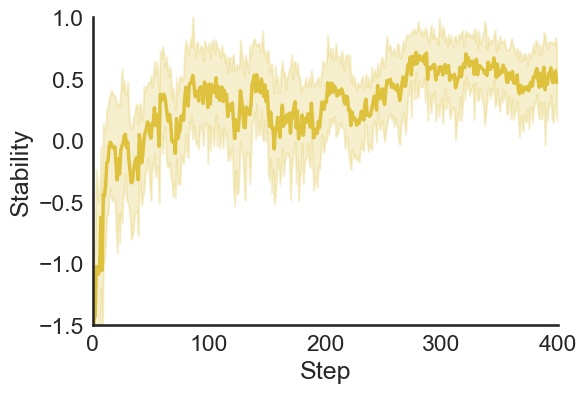

In [8]:
from utils import plot_style_utils
import numpy as np

plot_style_utils.set_pub_plot_context(context="talk")

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

prop = 'raw_stability'
ylabel = 'Stability'
n_step = 400

df_plot = opt_step[opt_step.step < n_step][['step', prop]].groupby('step').mean()
df_plot_std = opt_step[opt_step.step < n_step][['step', prop]].groupby('step').std()

# Consistent color theme with the first plot
line_color = '#DEC13C' 

ax.plot(df_plot.index.values, df_plot[prop].values, 
        color=line_color, linewidth=2.5)

ax.fill_between(df_plot.index.values, 
                df_plot[prop].values - df_plot_std[prop].values, 
                df_plot[prop].values + df_plot_std[prop].values, 
                color=line_color,
                alpha=0.25)

ax.set_xlabel('Step')
ax.set_ylabel(ylabel)
ax.set_xlim(0, n_step)
ax.set_ylim(-1.5, 1)
plot_style_utils.save_for_pub(fig, path='figures/round3/R3_step_stability')


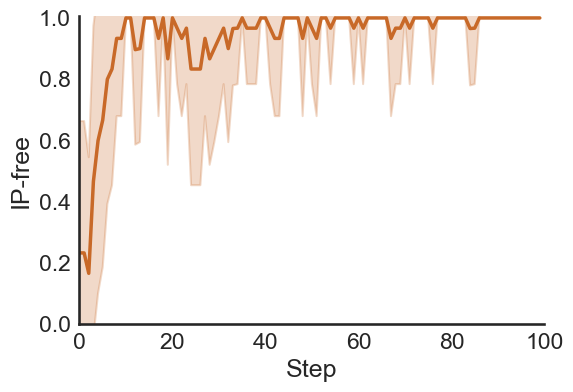

In [9]:
from utils import plot_style_utils
import numpy as np

plot_style_utils.set_pub_plot_context(context="talk")

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

prop = 'bonus'
ylabel = 'IP-free'
n_step = 100

opt_step[prop] = opt_step[prop] - 1
df_plot = opt_step[opt_step.step < n_step][['step', prop]].groupby('step').mean()
df_plot_std = opt_step[opt_step.step < n_step][['step', prop]].groupby('step').std()

# Consistent color theme with the first plot
line_color = '#C86928' 

ax.plot(df_plot.index.values, df_plot[prop].values, 
        color=line_color, linewidth=2.5)

ax.fill_between(df_plot.index.values, 
                df_plot[prop].values - df_plot_std[prop].values, 
                df_plot[prop].values + df_plot_std[prop].values, 
                color=line_color,
                alpha=0.25)

ax.set_xlabel('Step')
ax.set_ylabel(ylabel)
ax.set_xlim(0, n_step)
ax.set_ylim(0, 1.005)
plot_style_utils.save_for_pub(fig, path='figures/round3/R3_step_ip_free')
